# Problem Description
Customer churn, the process by which customers stop usigng a company's offerings, is a critical challenge for businesses, especially in competetive industries like telecommunications. These factors that influence customer churn are essential for streamlining operations, reducing costs, and improving user experience.

The Telco Customer Churn dataset provides a vast set of data about a fictional telecommunications company's customers, including demographics, account information, and usage paterns. Each record is labeled with a binary classification of whether the customer has churned or not.

A solution to this problem will greatly alleviate the burden upon companies of dumping resources upon customers who will churn over and will be helpful for reducing unpredictability and cost. The primary stages of solving this problem are as follows:

1. Exploratory Data Analysis
2. Model Architecture and Training
3. Results and Performance
4. Discussion and Conclusion

Project GitHub Repo: https://github.com/JeffreyLind3/CSCA5622

# Exploratory Data Analysis
First, we will load the [data](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) and display the schema

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('TelcoCustomerChurn.csv')

In [3]:
# Dataset Structure
df.info()

# Dataset Summary
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Predictors and Feature
As can be seen, the dataset consists of 20 predictors and 1 feature (Churn). This machine learning problem is in the class of binary classification problems - the feature is a discrete variable that can only take two values, corresponding to "Yes" (the customer did churn) or "No" (the customer did not churn). This dataset is known to have no null values and no duplicate records, so we can skip that step. Now, we will look at some statistical properties of the dataset.

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The fictional company's monthly charges to users ranges from  \\$18.25 to \\$118.75 with the tenure (the number of months that the customer has had their service with the company) ranging from 0 months to 72 months. Below, we delete the customerID column since it is not needed for this model.

In [5]:
df.drop('customerID', axis=1, inplace=True)

Now, we will take care of putting the data into proper encodings and data types for the feature analysis stage.

In [6]:
df = df.copy()

def ordinal_encoding(column_name, ordering):
    df[column_name] = pd.Categorical(df[column_name], categories=ordering, ordered=True).codes

def category_encoding(column_name):
    df[column_name] = df[column_name].astype('category')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')
df = df.dropna(subset=['TotalCharges']).copy()

# Use boolean variables for binary columns (for some reason .astype(bool) does not work for many columns)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1}).astype(bool)
df['SeniorCitizen'] = df['SeniorCitizen'].map({'Yes': True, 'No': False})
df['Partner'] = df['Partner'].map({'Yes': True, 'No': False})
df['Dependents'] = df['Dependents'].map({'Yes': True, 'No': False})
df['PhoneService'] = df['PhoneService'].map({'Yes': True, 'No': False})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': True, 'No': False})
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})

# Binary encoding for non-ordinal, non-binary columns
for column in [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod'
]:
    category_encoding(column)

# Ordinal encoding for ordinal columns
contract_ordering = ['Month-to-month', 'One year', 'Two year']
ordinal_encoding('Contract', contract_ordering)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   bool    
 1   SeniorCitizen     0 non-null      object  
 2   Partner           7032 non-null   bool    
 3   Dependents        7032 non-null   bool    
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   bool    
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   int8    
 15  PaperlessBilling  7032 non-null   bool    
 16  PaymentMethod     7032 non-nu

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,NaN,True,False,1,False,No phone service,DSL,No,Yes,No,No,No,No,0,True,Electronic check,29.85,29.85,False
1,True,NaN,False,False,34,True,No,DSL,Yes,No,Yes,No,No,No,1,False,Mailed check,56.95,1889.50,False
2,True,NaN,False,False,2,True,No,DSL,Yes,Yes,No,No,No,No,0,True,Mailed check,53.85,108.15,True
3,True,NaN,False,False,45,False,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,False,Bank transfer (automatic),42.30,1840.75,False
4,False,NaN,False,False,2,True,No,Fiber optic,No,No,No,No,No,No,0,True,Electronic check,70.70,151.65,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,True,NaN,True,True,24,True,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,1,True,Mailed check,84.80,1990.50,False
7039,False,NaN,True,True,72,True,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,1,True,Credit card (automatic),103.20,7362.90,False
7040,False,NaN,True,True,11,False,No phone service,DSL,Yes,No,No,No,No,No,0,True,Electronic check,29.60,346.45,False
7041,True,NaN,True,False,4,True,Yes,Fiber optic,No,No,No,No,No,No,0,True,Mailed check,74.40,306.60,True


# Model Architecture and Training
First, we will split the dataset into training and testing sets so that we can train the model on one portion of the data and evaluate the model's performance on the other portion of data.

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X = pd.get_dummies(X, drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Many machine learning models have higher performance with feature scaling, so therefore we will normalize the features.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Next, we will train multiple machine learning models to determine the best models for this use case. We will stick with machine learning models designed for binary classification tasks: logistic regression, decision trees, random forest, support vector machine, and k-nearest neighbors. 

## Model Training
First, the models will be initialized.

In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(max_iter=1000000)
logistic_regression.fit(X_train_scaled, y_train)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Support Vector Machine
from sklearn.svm import SVC
support_vector_machine = SVC(probability=True, random_state=42)
support_vector_machine.fit(X_train_scaled, y_train)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
k_nearest_neighbors = KNeighborsClassifier(n_neighbors=5)
k_nearest_neighbors.fit(X_train_scaled, y_train)

KNeighborsClassifier()

# Results and Performance
Now, we will see the performance of each model architecture on the testing dataset.

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

def evaluate_model(model, X_test, y_test, scaled=False):
    if scaled:
        X_test = scaler.transform(X_test)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

print("Logistic Regression Performance:")
evaluate_model(logistic_regression, X_test, y_test, scaled=True)

print("Decision Tree Performance:")
evaluate_model(decision_tree, X_test, y_test)

print("Random Forest Performance:")
evaluate_model(random_forest, X_test, y_test)

print("SVM Performance:")
evaluate_model(support_vector_machine, X_test, y_test, scaled=True)

print("KNN Performance:")
evaluate_model(k_nearest_neighbors, X_test, y_test, scaled=True)

Logistic Regression Performance:
[[916 117]
 [180 194]]
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Decision Tree Performance:
[[833 200]
 [185 189]]
              precision    recall  f1-score   support

       False       0.82      0.81      0.81      1033
        True       0.49      0.51      0.50       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.73      0.73      1407

Random Forest Performance:
[[920 113]
 [199 175]]
              precision    recall  f1-score   support

       False       0.82      0.89      0.86      1033
        True       0.61      0.47      0.53       374

    accuracy              

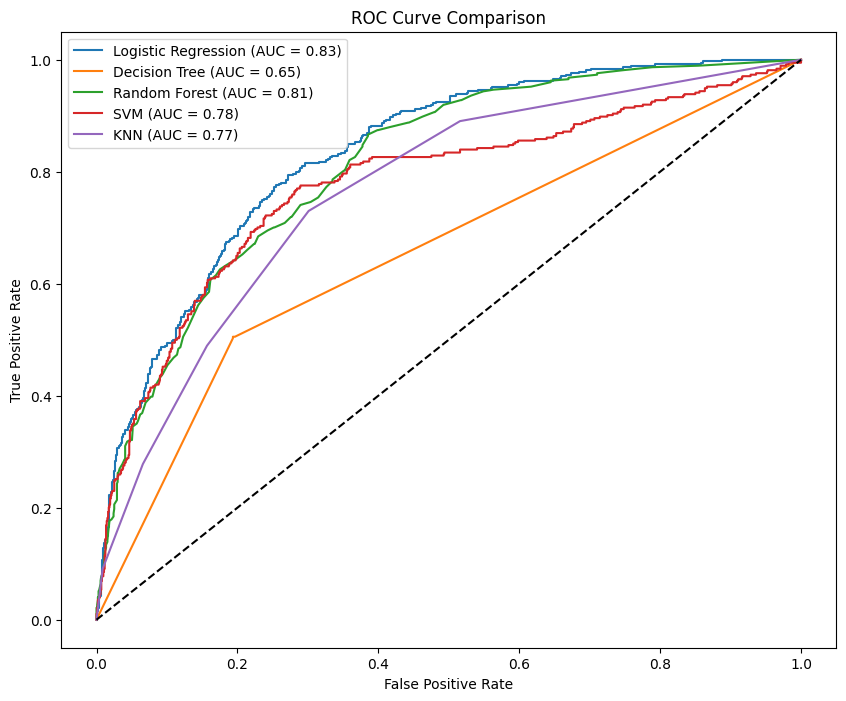

In [11]:
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': (logistic_regression, True),
    'Decision Tree': (decision_tree, False),
    'Random Forest': (random_forest, False),
    'SVM': (support_vector_machine, True),
    'KNN': (k_nearest_neighbors, True)
}

plt.figure(figsize=(10, 8))

for name, (model, scaled) in models.items():
    if scaled:
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

The results of the model evaluations demonstrate varying levels of performance in predicting customer churn. Logistics regression achieved the best overall performance, with an accuracy of 79% and an AUC of 0.83, indicating strong predictive capability and a good balance between precision and recall (F1-score of 0.57 for the churn class). Random forest closely followed with an accuracy of 78% and an AUC of 0.81, but it struggled more with recall for the churn class. SVM and KNN showed moderate performance with an AUC of 0.78 and 0.77, respectively, and an accuracy around 75-78%. The decision tree model, while interpretable, performed the least effectively, with an AUC of 0.65 and is subpar in identifying churned customers.

Thus, logistic regression emerges as the best model for this type of data, offering robust performance performance while maintaining simplicity. However, Random Forest also presents itself as a strong alternative, particularly if feature importance insights are needed for business decisions. These results highlight the trade-offs between simplicity, interpretability, and predictive power among different classification techniques.

# Discussion and Conclusion

The analysis of customer churn in the telecommunications industry highlights critical insights and model performances that can guide business strategies for customer retention. Logistic regression emerged as the best-performing model, achieving an AUC of 0.83 and demonstrating strong predictive capability for identifying churned customers. Its simplicity and interpretability make it a valuable tool for deriving actionable insights, such as understanding which features (e.g. contract type, monthly charges, or tenure) significantly impact customer churn.

Random forest also showed competitive performance with an AUC of 0.81, offering additional benefits in terms of feature importance analysis. While models like SVM and KNN demonstrated moderate effectiveness, their reliance on scaling and hyperparameter sensitivity posed additional complexity. The Decision Tree, while easy to interpret, performed less effectively, particularly in identifying churned customers, suggesting its limited applicability without further refinement.

The results underscore the importance of addressing class imbalance in predictive modeling, as models generally struggled with recall for the minority class (churned customers). Techniques such as resampling, feature engineering, or hyperparameter tuning could further enhance recall and overall model robustness.

In conclusion, the study successfully demonstrated the application of various machine learning models to predict customer churn, providing actionable insights for retention strategies. Logistic regression and random forest stand out as the most effective approaches, offering a balance of accuracy, interpretability, and business value. Future work could involve exploring ensemble methods, optimizing hyperparameters, or incorporating additional data to improve predictive performance and refine strategies for reducing churn. These findings provide a solid foundation for implementing data-driven retention policies, ultimately contributing to improved customer satisfaction and reduced operational costs.